In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import defaultdict, deque

In [12]:
# Example of a DAG with 10 tasks for simplicity
# tasks = [f'T{i}' for i in range(1, 11)]
# edges = [('T1', 'T2'), ('T1', 'T3'), ('T2', 'T4'), ('T3', 'T4'), ('T4', 'T5'), ('T5', 'T6'), ('T6', 'T7'), ('T6', 'T8'), ('T7', 'T9'), ('T8', 'T10')]
# delays = {f'T{i}': random.randint(1, 5) for i in range(1, 11)}
tasks = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
delays = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 0}

In [49]:
def is_valid_schedule(schedule):
    """Check if the schedule respects the precedence constraints."""
    task_to_index = {task: index for index, task in enumerate(schedule)}
    for u, v in edges:
        if task_to_index[u] > task_to_index[v]:
            return False
    return True

In [14]:
is_valid_schedule(['A', 'E', 'B', 'D', 'C'])

{'A': 0, 'E': 1, 'B': 2, 'D': 3, 'C': 4}


False

In [15]:
def calculate_finish_time(schedule, edges, delays):
    """Calculate the finish time of a given schedule."""
    graph = defaultdict(list)
    dp = {t: 0 for t in tasks}
    
    for u, v in edges:
        graph[u].append(v)

    for t in schedule:
        for v in graph[t]:
            dp[v] = max(dp[v], dp[t] + delays[t] + 1)
    
    finish_time = max(dp.values())
    
    return finish_time

In [52]:
def create_initial_population(size):
    """Create an initial population of valid schedules."""
    population = []
    for _ in range(size):
        while True:
            schedule = random.sample(tasks, len(tasks))
            if is_valid_schedule(schedule):
                population.append(schedule)
                break
    return population

In [94]:
def selection(population, tournament_size):
    chosen = random.sample(population, tournament_size)
    return min(chosen, key=lambda x: calculate_finish_time(x, edges, delays))

In [226]:
def crossover(parent1, parent2):
    """Perform crossover between two parents to create a child."""
    idx1, idx2 = sorted(random.sample(range(len(tasks)), 2))
    child = [None] * len(tasks)
    child[idx1:idx2+1] = parent1[idx1:idx2+1]
    
    current_pos = 0
    for task in parent2:
        if task not in child:
            while child[current_pos] is not None:
                current_pos += 1
            child[current_pos] = task
    return child

In [98]:
def mutate(schedule):
    """Perform mutation by swapping two random tasks."""
    idx1, idx2 = random.sample(range(len(tasks)), 2)
    schedule[idx1], schedule[idx2] = schedule[idx2], schedule[idx1]
    return schedule

In [229]:
def genetic_algorithm(population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = create_initial_population(population_size)
    new_population = population.copy()
    
    for i in range(num_generations):
        population = sorted(population, key=lambda s: calculate_finish_time(s, edges, delays))
        new_population[:elitism_size] = population[:elitism_size]
        for j in range(elitism_size, population_size, 2):
            parent1 = selection(population, tournament_size)
            parent2 = selection(population, tournament_size)

            child = crossover(parent1, parent2)
            
            if random.random() < mutation_prob:
                child = mutate(child)
            if is_valid_schedule(child):
                new_population.append(child)
        
        population = new_population.copy()
        
    best_schedule = min(population, key=lambda s: calculate_finish_time(s, edges, delays))
    return best_schedule, calculate_finish_time(best_schedule, edges, delays)

In [230]:
# Run the genetic algorithm
best_schedule, best_finish_time = genetic_algorithm(population_size=100, 
                                                    num_generations=50, 
                                                    tournament_size=7,
                                                    elitism_size=3,
                                                    mutation_prob=0.1)

print("Best Schedule:", best_schedule)
print("Finish Time:", best_finish_time)

Best Schedule: ['A', 'B', 'C', 'D', 'E']
Finish Time: 8


In [231]:
def draw_graph(tasks, edges, delays):
    G = nx.DiGraph()
    
    G.add_nodes_from(tasks)
    
    # Add edges with weights (delays)
    G.add_edges_from(edges)
    
    # Define positions for nodes using a layout
    pos = nx.spring_layout(G)
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=16, font_color='black', arrowstyle='-|>', arrowsize=20)
    
    # Draw the delays as separate text next to the nodes
    for node, (x, y) in pos.items():
        plt.text(x + 0.09, y - 0.075, s=f"Delay: {delays[node]}", bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center', fontsize=12, color='blue')
    
    # Show the plot
    plt.show()

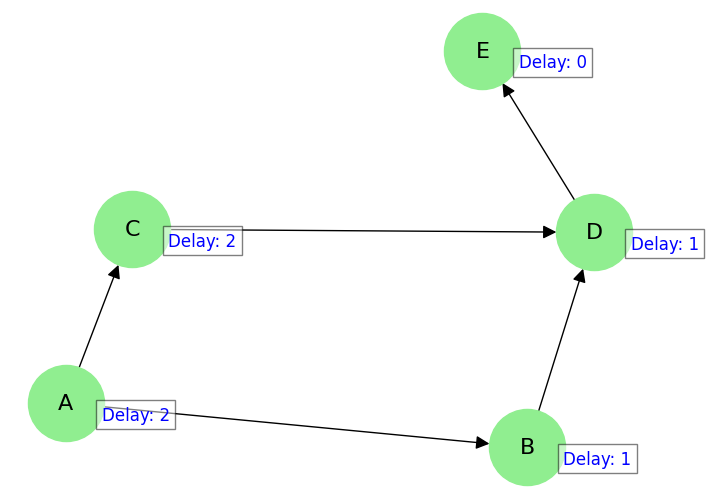

In [232]:
draw_graph(tasks, edges, delays)

In [240]:
tasks = [f'T{i}' for i in range(1, 30001)]

In [241]:
tasks

['T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24',
 'T25',
 'T26',
 'T27',
 'T28',
 'T29',
 'T30',
 'T31',
 'T32',
 'T33',
 'T34',
 'T35',
 'T36',
 'T37',
 'T38',
 'T39',
 'T40',
 'T41',
 'T42',
 'T43',
 'T44',
 'T45',
 'T46',
 'T47',
 'T48',
 'T49',
 'T50',
 'T51',
 'T52',
 'T53',
 'T54',
 'T55',
 'T56',
 'T57',
 'T58',
 'T59',
 'T60',
 'T61',
 'T62',
 'T63',
 'T64',
 'T65',
 'T66',
 'T67',
 'T68',
 'T69',
 'T70',
 'T71',
 'T72',
 'T73',
 'T74',
 'T75',
 'T76',
 'T77',
 'T78',
 'T79',
 'T80',
 'T81',
 'T82',
 'T83',
 'T84',
 'T85',
 'T86',
 'T87',
 'T88',
 'T89',
 'T90',
 'T91',
 'T92',
 'T93',
 'T94',
 'T95',
 'T96',
 'T97',
 'T98',
 'T99',
 'T100',
 'T101',
 'T102',
 'T103',
 'T104',
 'T105',
 'T106',
 'T107',
 'T108',
 'T109',
 'T110',
 'T111',
 'T112',
 'T113',
 'T114',
 'T115',
 'T116',
 'T117',
 'T118',
 'T119',
 'T120',
 'T121',
 'T122',
 'T123',
 

In [242]:
import random

edges = []
for i in range(1, 30001):
    # Define the range of nodes that can be connected to
    start = i + 1
    end = min(i + 5, 30001)  # Ensure we do not go out of bounds
    # Compute the maximum number of targets we can sample
    max_targets = end - start
    if max_targets > 0:
        num_connections = random.randint(1, min(5, max_targets))  # Random number of connections within the bounds
        targets = random.sample(range(start, end), num_connections)
        for target in targets:
            edges.append((f'T{i}', f'T{target}'))

In [243]:
edges

[('T1', 'T3'),
 ('T1', 'T5'),
 ('T2', 'T3'),
 ('T2', 'T4'),
 ('T2', 'T5'),
 ('T3', 'T4'),
 ('T3', 'T7'),
 ('T3', 'T6'),
 ('T3', 'T5'),
 ('T4', 'T8'),
 ('T4', 'T5'),
 ('T4', 'T6'),
 ('T5', 'T9'),
 ('T6', 'T8'),
 ('T6', 'T7'),
 ('T6', 'T10'),
 ('T6', 'T9'),
 ('T7', 'T10'),
 ('T7', 'T9'),
 ('T7', 'T8'),
 ('T8', 'T9'),
 ('T9', 'T12'),
 ('T9', 'T11'),
 ('T9', 'T13'),
 ('T9', 'T10'),
 ('T10', 'T12'),
 ('T10', 'T13'),
 ('T11', 'T14'),
 ('T11', 'T12'),
 ('T12', 'T14'),
 ('T12', 'T15'),
 ('T13', 'T16'),
 ('T14', 'T16'),
 ('T14', 'T15'),
 ('T14', 'T18'),
 ('T14', 'T17'),
 ('T15', 'T16'),
 ('T15', 'T19'),
 ('T15', 'T18'),
 ('T16', 'T19'),
 ('T16', 'T20'),
 ('T17', 'T18'),
 ('T17', 'T21'),
 ('T17', 'T20'),
 ('T17', 'T19'),
 ('T18', 'T22'),
 ('T18', 'T20'),
 ('T19', 'T20'),
 ('T19', 'T22'),
 ('T20', 'T22'),
 ('T21', 'T23'),
 ('T21', 'T25'),
 ('T22', 'T24'),
 ('T23', 'T25'),
 ('T23', 'T27'),
 ('T24', 'T27'),
 ('T24', 'T25'),
 ('T25', 'T29'),
 ('T25', 'T27'),
 ('T26', 'T27'),
 ('T27', 'T28'),
 ('T27'

In [244]:
import random

delays = {f'T{i}': random.randint(1, 10) for i in range(1, 30001)}

In [245]:
best_schedule, best_finish_time = genetic_algorithm(population_size=100, 
                                                    num_generations=50, 
                                                    tournament_size=20,
                                                    elitism_size=3,
                                                    mutation_prob=0.1)
print("Best Schedule:", best_schedule)
print("Finish Time:", best_finish_time)

KeyboardInterrupt: 